# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

Далее представлена простая иллюстрация явного метода Эйлера для решения такого уравнения.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [27]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


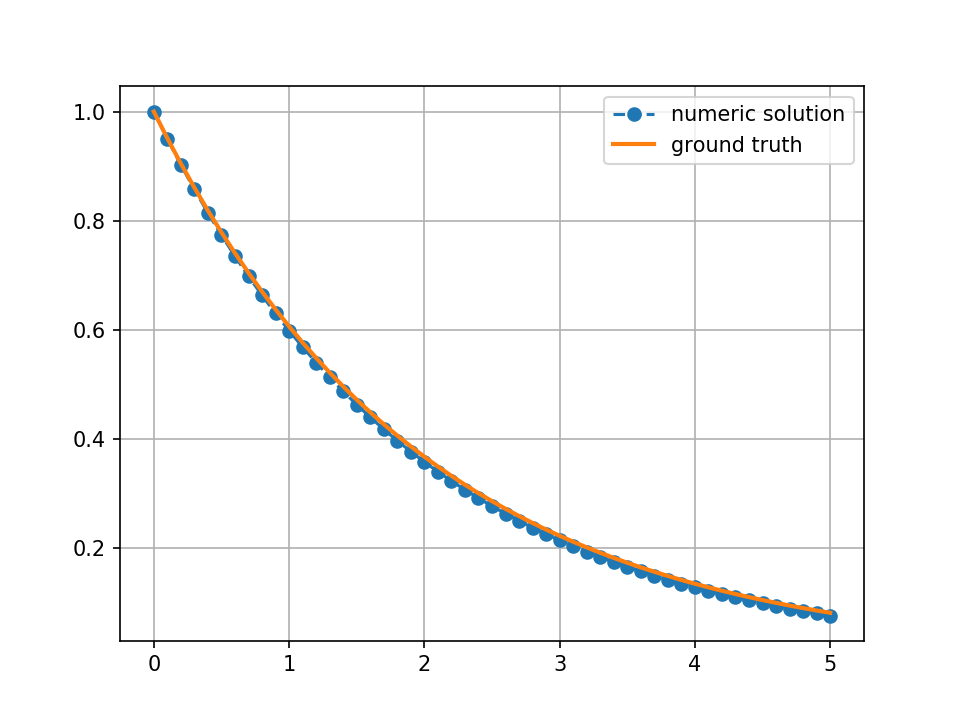

In [36]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Тест I.1

Проверьте функцию выше, варьируя шаг $\tau$ (в коде это `dt`), $|\lambda| \tau > 1$.

(10% итоговой оценк

<IPython.core.display.Javascript object>


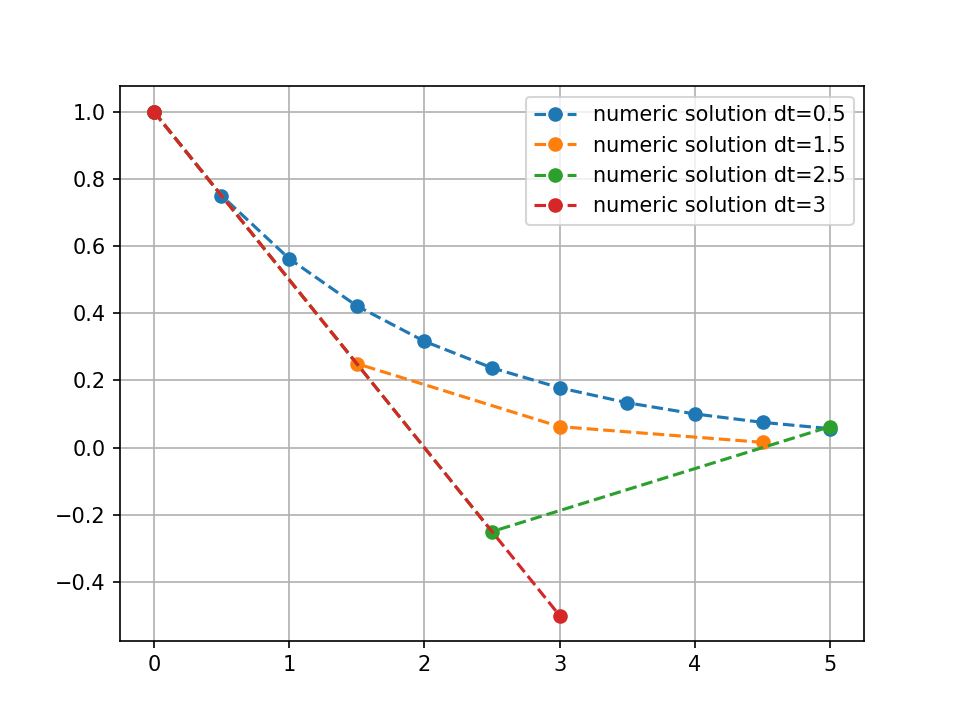

In [39]:
lam = -0.5
tt_1, y_1 = euler_solve(lam, u0=1.0, T=5, dt=0.5)
plt.plot(tt_1, y_1, 'o--', label='numeric solution dt=0.5')
plt.legend(loc='best')
plt.grid(True)


tt_2, y_2 = euler_solve(lam, u0=1.0, T=5, dt=1.5)
plt.plot(tt_2, y_2, 'o--', label='numeric solution dt=1.5')
plt.legend(loc='best')
plt.grid(True)


tt_3, y_3 = euler_solve(lam, u0=1.0, T=5, dt=2.5)
plt.plot(tt_3, y_3, 'o--', label='numeric solution dt=2.5')
plt.legend(loc='best')
plt.grid(True)

tt_4, y_4 = euler_solve(lam, u0=1.0, T=5, dt=3)
plt.plot(tt_4, y_4, 'o--', label='numeric solution dt=3')
plt.legend(loc='best')
plt.grid(True)

### Тест I.2

Решите то же самое уравнение $du/dt = \lambda u$, используя невную схему Эйлера. Сравните поведение неянвой и явной схем Эйлера. Обсудите.

(10% итогвой оценки)

In [45]:
def backward_euler(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1 - dt*lam)
    return tt, y

<IPython.core.display.Javascript object>


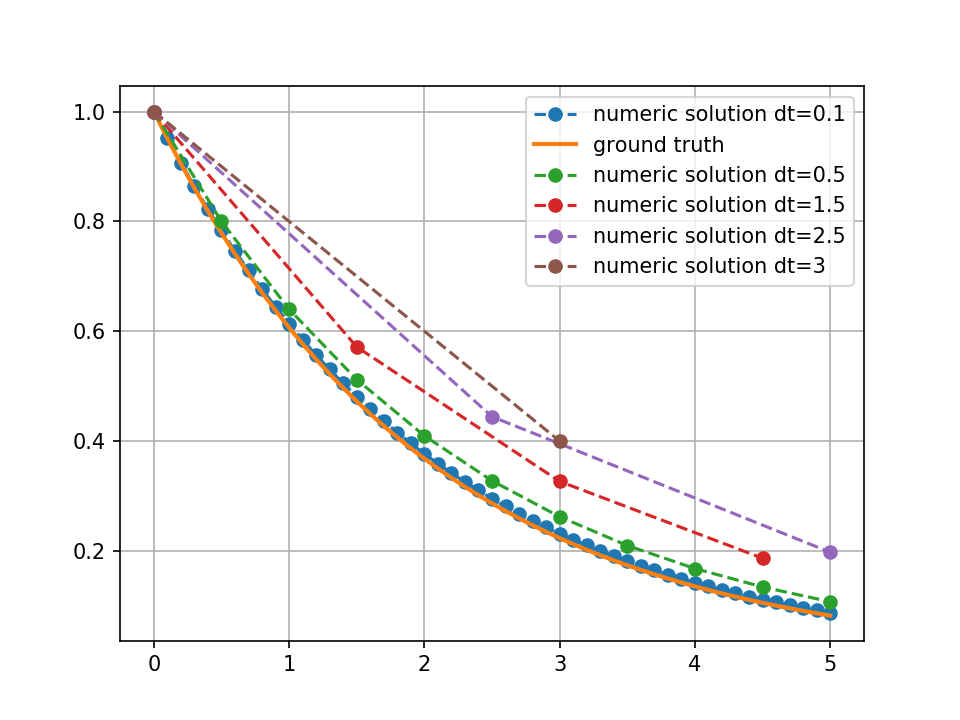

In [46]:
lam = -0.5
tt, y = backward_euler(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution dt=0.1')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

tt_1, y_1 = backward_euler(lam, u0=1.0, T=5, dt=0.5)
plt.plot(tt_1, y_1, 'o--', label='numeric solution dt=0.5')
plt.legend(loc='best')
plt.grid(True)


tt_2, y_2 = backward_euler(lam, u0=1.0, T=5, dt=1.5)
plt.plot(tt_2, y_2, 'o--', label='numeric solution dt=1.5')
plt.legend(loc='best')
plt.grid(True)


tt_3, y_3 = backward_euler(lam, u0=1.0, T=5, dt=2.5)
plt.plot(tt_3, y_3, 'o--', label='numeric solution dt=2.5')
plt.legend(loc='best')
plt.grid(True)

tt_4, y_4 = backward_euler(lam, u0=1.0, T=5, dt=3)
plt.plot(tt_4, y_4, 'o--', label='numeric solution dt=3')
plt.legend(loc='best')
plt.grid(True)

## II. Жесткие системы.

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = const$ - известная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [9]:
def general_euler(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y1 = np.empty(num_steps+1)
    y1[0] = u0[0]
    y2 = np.empty(num_steps+1)
    y2[0] = u0[1]
    A1 = A[0]
    A2 = A[1]
    for k in range(num_steps):
        y1[k+1] = (A1[0]*y1[k]+A1[1]*y2[k])*dt + y1[k]
        y2[k+1] = (A2[0]*y1[k]+A2[1]*y2[k])*dt + y2[k]
    return tt, y1, y2

### Тест II.1

Возьмите 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $\mathbf{u} = (1, 0)^T$.

Решите систему, используя фиксированный шаг $\tau=0.01$. Стабилен ли метод на шаге такого размера?

Найдите собственные значения $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(20% итоговой оценки)

<IPython.core.display.Javascript object>


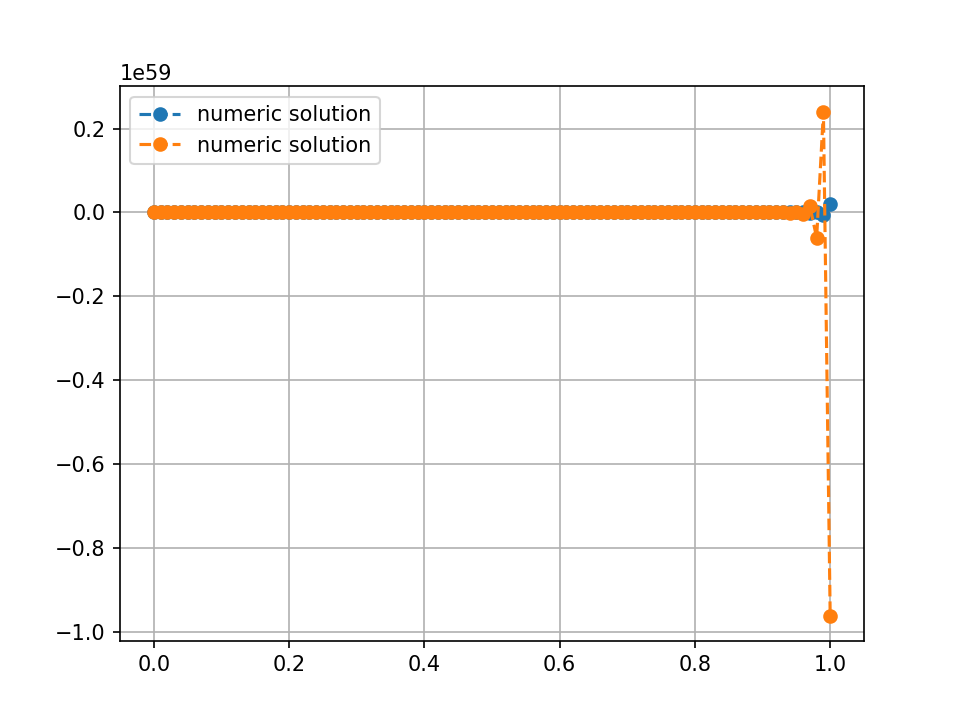

In [10]:
A = np.array([[-10, 10], [32, -499]])
u0 = np.array([1, 0])
tt, y1, y2 = general_euler(A, u0, T=1, dt=0.01)
plt.plot(tt, y1, 'o--', label='numeric solution')
plt.plot(tt, y2, 'o--', label='numeric solution')
plt.legend(loc='best')
plt.grid(True)

In [11]:
l = np.linalg.eigvals(A)
print(l)

[  -9.34647667 -499.65352333]


### Тест II.2

Реализуйте $\textit{неявную}$ схему Эйлера для системы линейных уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линйных алгебраических уравнений (используйте `np.linalg.solve`).

Выполните те же самые шаги, что и в тесте II.1 с таким же шагом $\tau=0.01$. Сравните решения, полученные явной и неявной схемами Эйлера.

(20% итоговой оценки)

In [5]:
def backward_gen_euler(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    N = u0.shape[0]
    E = np.eye(N)
    u = np.ones((num_steps+1, N))
    u[0][0] = u0[0]
    u[0][1] = u0[1]
    M = E - A*dt
    for k in range(num_steps):
        u[k+1] = np.linalg.solve(M, u[k])
    return tt, u

<IPython.core.display.Javascript object>


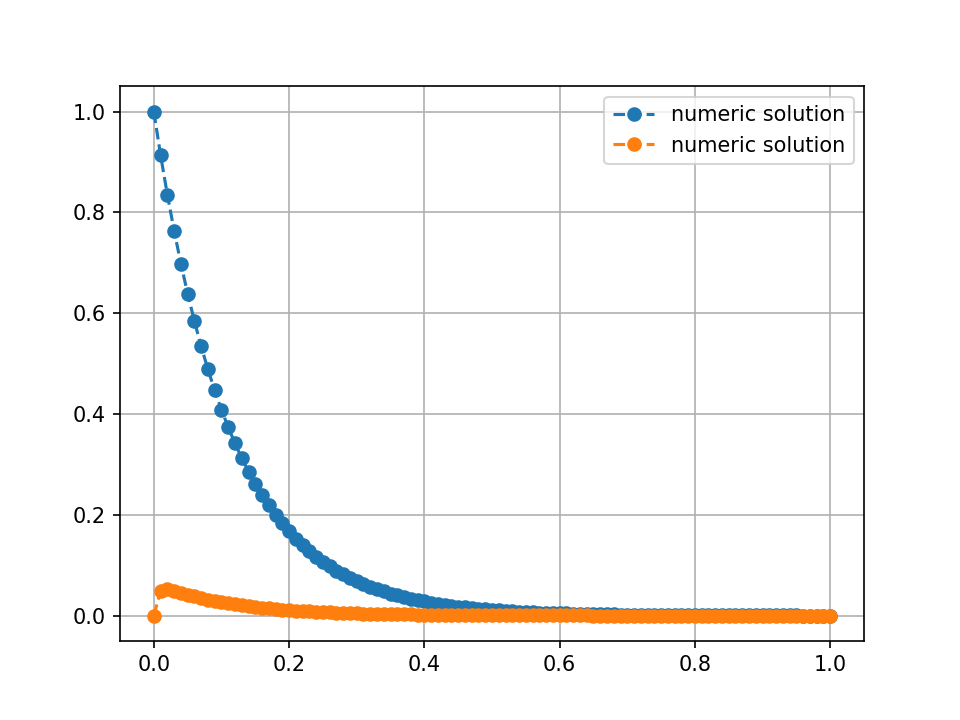

In [7]:
A = np.array([[-10, 10], [32, -499]])
u0 = np.array([1, 0])
tt, u = backward_gen_euler(A, u0, T=1, dt=0.01)
plt.plot(tt, u, 'o--', label='numeric solution')
plt.legend(loc='best')
plt.grid(True)

Мы видим что для явной схемы эйлера получается неочень адекватная картина, а для явной получается довольно нормальное решение.

# III. ОДУ второго порядка.

Рассмотрим ОДУ второго порядка, описывающее осцилляции маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Преобразуйте данное уравнение второго порядка в систему ОДУ первого порядка.

### Тест III.1 

Решите данную систему уравнений, используя явную  схему Эйлера так, чтобы ответ захватывал хотя бы несколько периодов осциллятора. 

Мы знаем, что в отсутствии трения выполняется закон сохранения энергии:

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

Постройте зависимость $E$ от времени для вашего численного решения. Используйте несколько значений шага. Выполняетс ли закон сохранения энергии?

(20% итоговой оценки)

In [11]:
import math

<IPython.core.display.Javascript object>


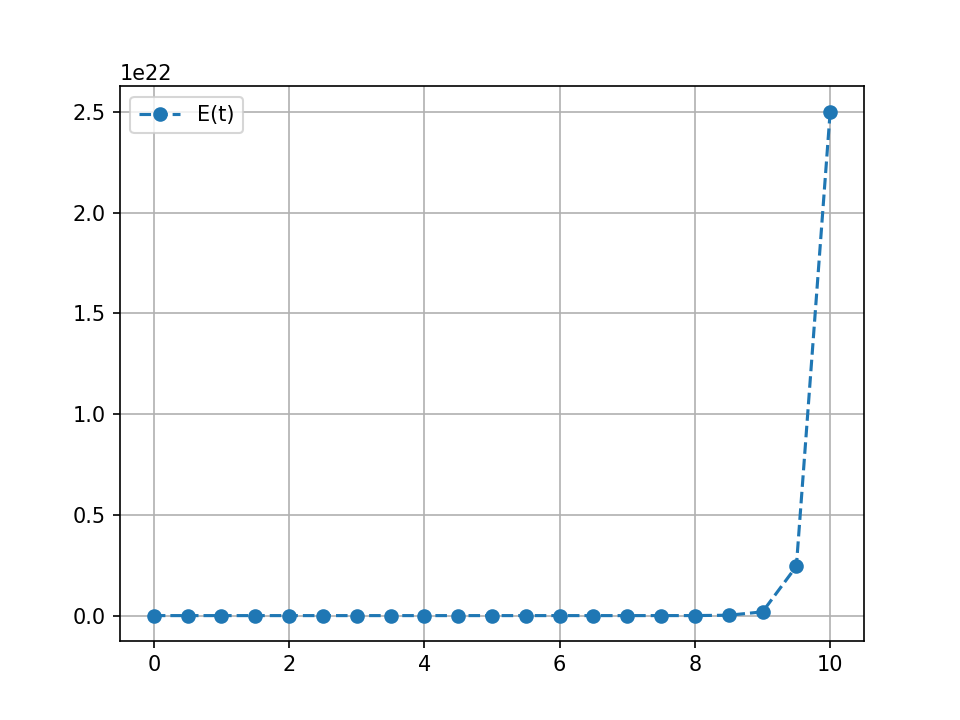

In [25]:
A = np.array([[0, 1], [-omega**2, 1]])
omega = 2*math.pi
u0 = np.array([0., omega])
tt, y1, y2 = general_euler(A, u0, T=10, dt=0.5)
n = tt.shape[0]
for i in range (n):
    E[i] = ((y2[i])**2 + (omega**2)*(y1[i])**2)/2
plt.plot(tt, E, 'o--', label='E(t)' )
plt.legend(loc='best')
plt.grid(True)

Закон сохранения энергии выполняется, но только в течении нескольких перодов. Дальше 8-го периода она стремительно растёт.

### Тест III.2

Реализуйте схему Рунге - Кутта второго порядка. Используте ее для решения того же уравнения с теми же шагами. Сравните решения, полученные методом Рунге - Кутта и методом Эйлера на одинаковых промежутках времени. Проверьте закон сохранения энергии. Обсудите.

(20% итоговой оценки)

In [32]:
 def runge_kutta(A, u0, T, dt):  
    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([num_steps + 1, 2])
    y[0, :] = u0
    for k in range(num_steps):
        Y = y[k, :] + dt*(A @ y[k, :]) / 2
        y[k+1, :] = y[k, :] + dt*(A@Y)
    return tt, y

<IPython.core.display.Javascript object>


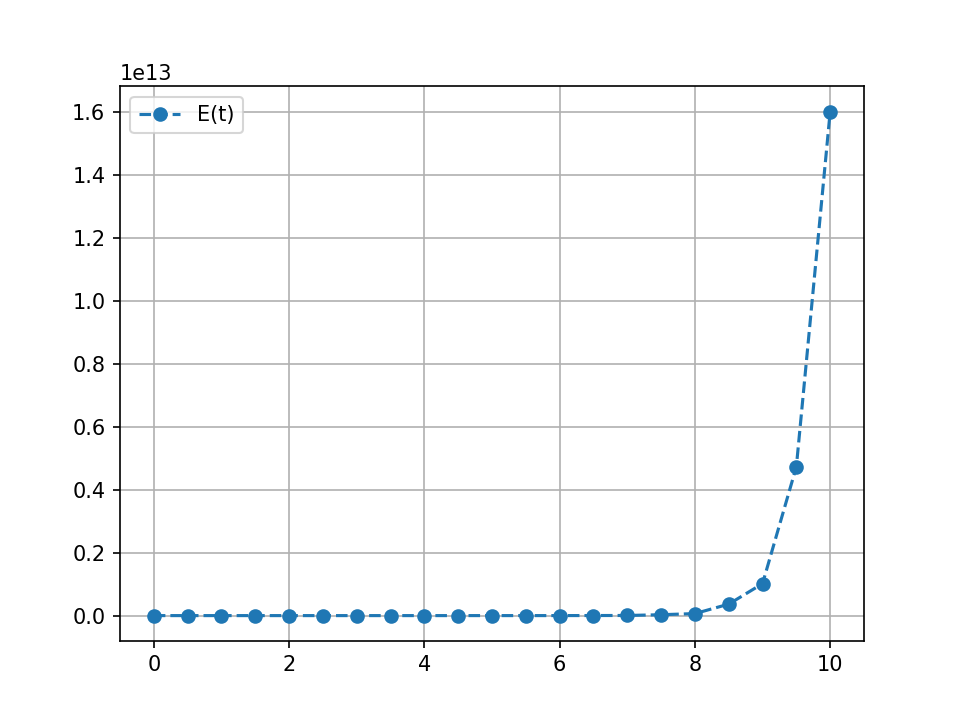

In [34]:
A = np.array([[0, 1], [-omega**2, 1]])
omega = 2*math.pi
u0 = np.array([0., omega])
tt, y = runge_kutta(A, u0, T=10, dt=0.5)
n = tt.shape[0]
for i in range (n):
    E = (y[:, 1] ** 2 + omega ** 2 * y[:, 0] ** 2) / 2
plt.plot(tt, E, 'o--', label='E(t)' )
plt.legend(loc='best')
plt.grid(True)

Итак, мы получили аналогичный результат что и в предыдущем задании.